# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import regularizers



**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
data= tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/swethankreddy/Downloads/learnerspacedataset',  
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64,64),
    batch_size=32,
    shuffle=True
)



Found 1658 files belonging to 4 classes.
Using 1327 files for training.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [4]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

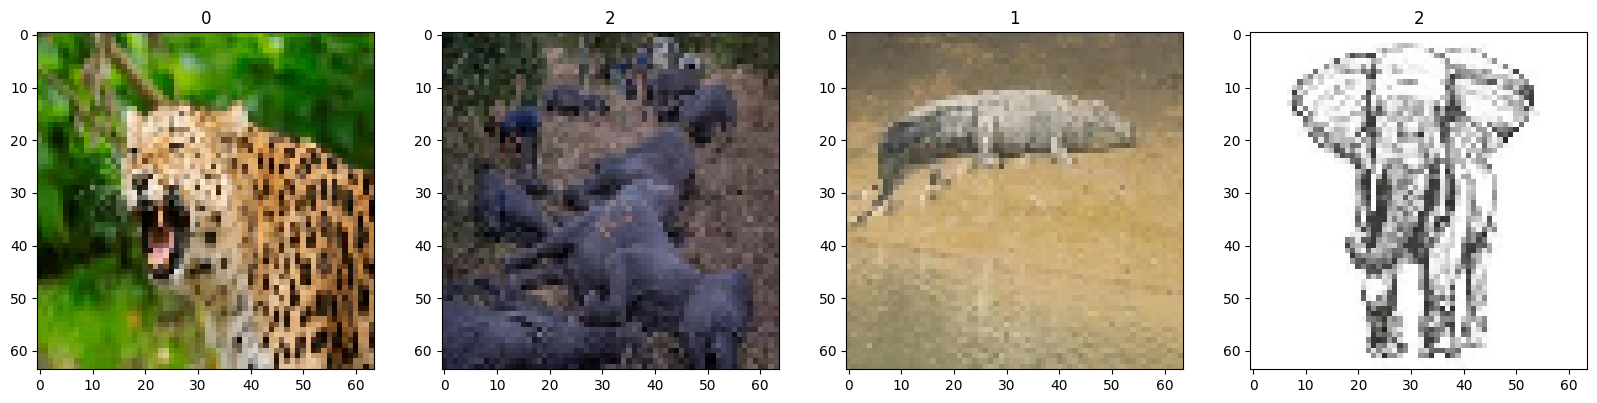

In [5]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [6]:
data = data.map(lambda x, y: (x/255, y))


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [7]:
train_size=int(len(data)*.7)
test_size=int(len(data)*.2)
val_size=int(len(data)*.1)
train_data=data.take(train_size)
val_data=data.skip(train_size).take(val_size)
test_data=data.skip(train_size+val_size).take(test_size)




**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [8]:
model= Sequential([
    Conv2D(32,(3,3), activation='relu' , input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3), activation='relu' ),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(4, activation='softmax')

])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Q.6 Compile your model

In [9]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [10]:
model.fit(data, validation_data=val_data, epochs=10)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2864 - loss: 1.5028 - val_accuracy: 0.4219 - val_loss: 1.2840
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4372 - loss: 1.2685 - val_accuracy: 0.6328 - val_loss: 0.9805
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5535 - loss: 1.0948 - val_accuracy: 0.6016 - val_loss: 0.8985
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6198 - loss: 0.9097 - val_accuracy: 0.7188 - val_loss: 0.7547
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7163 - loss: 0.7449 - val_accuracy: 0.8438 - val_loss: 0.5705
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7593 - loss: 0.6214 - val_accuracy: 0.7891 - val_loss: 0.5663
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8050 - loss: 0.5166 - val_accuracy: 0.8828 - val_loss: 0.4093
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8347 - loss: 0.4560 - val_accuracy: 0.8516 - v

**Q.8** Test your code with test set

In [11]:
loss, accuracy = model.evaluate(val_data)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9781 - loss: 0.1304
Validation loss: 0.15288735926151276
Validation accuracy: 0.96875


In [12]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.96875


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**